Aug 7, 2025

Test case for making a HeatMCP. This is just to test regular API connection to NWS API:


# Getting Weather Data
This is a reimplementation from [this link](https://blog.deeplink.kr/how-to-use-the-national-weather-service-nws-api-with-python-example-code/)

In [ ]:
import requests

# Dallas
latitude = 32.7767
longitude = -96.7970

# Boston
# latitude = 42.3555
#longitude = -71.0565

# NWS API endpoint
points_url = f"https://api.weather.gov/points/{latitude},{longitude}"

# Fetch location infromation
response = requests.get(points_url)
data = response.json()

In [2]:
# Extract observation station URL
observation_stations_url = data['properties']['observationStations']

# Fetch observation station data
stations_response = requests.get(observation_stations_url)
stations_data = stations_response.json()
stations = stations_data['observationStations']

In [3]:
len(stations)

74

In [4]:
# Fetch data from the first observation station
station_url = stations[0]

# Fetch Current weather data
current_weather_url = f"{station_url}/observations/latest"
current_weather_response = requests.get(current_weather_url)
current_weather_data = current_weather_response.json()

In [8]:
current_weather_data.keys()

dict_keys(['@context', 'id', 'type', 'geometry', 'properties'])

In [12]:
current_weather_data['properties'].keys()

dict_keys(['@id', '@type', 'elevation', 'station', 'stationId', 'stationName', 'timestamp', 'rawMessage', 'textDescription', 'icon', 'presentWeather', 'temperature', 'dewpoint', 'windDirection', 'windSpeed', 'windGust', 'barometricPressure', 'seaLevelPressure', 'visibility', 'maxTemperatureLast24Hours', 'minTemperatureLast24Hours', 'precipitationLast3Hours', 'relativeHumidity', 'windChill', 'heatIndex', 'cloudLayers'])

In [27]:
current_weather_data['properties']['cloudLayers']

[{'base': {'unitCode': 'wmoUnit:m', 'value': 3810}, 'amount': 'CLR'}]

In [28]:
# Print current weather information
current_observation = current_weather_data['properties']

print("Current Weather")
print(f"Temperature: {current_observation['temperature']['value']} C")
print(f"Humidity: {current_observation['relativeHumidity']['value']} %")
print(f"Wind Speed: {current_observation['windSpeed']['value']} m/s")
print(f"wind Direction: {current_observation['windDirection']['value']} degree")
print(f"Weather Description: {current_observation['textDescription']}")

Current Weather
Temperature: 30 C
Humidity: 48.616925106979 %
Wind Speed: 14.832 m/s
wind Direction: 60 degree
Weather Description: Clear


In [29]:
import requests

# Dallas
latitude = 32.7767
longitude = -96.7970

# Boston
# latitude = 42.3555
#longitude = -71.0565

# NWS API endpoint
points_url = f"https://api.weather.gov/points/{latitude},{longitude}"

# Fetch location infromation
response = requests.get(points_url)
data = response.json()

# Extract observation station URL
observation_stations_url = data['properties']['observationStations']

# Fetch observation station data
stations_response = requests.get(observation_stations_url)
stations_data = stations_response.json()
stations = stations_data['observationStations']

# Fetch data from the first observation station
station_url = stations[0]

# Fetch Current weather data
current_weather_url = f"{station_url}/observations/latest"
current_weather_response = requests.get(current_weather_url)
current_weather_data = current_weather_response.json()

# Print current weather information
current_observation = current_weather_data['properties']

print("Current Weather")
print(f"Temperature: {current_observation['temperature']['value']} C")
print(f"Humidity: {current_observation['relativeHumidity']['value']} %")
print(f"Wind Speed: {current_observation['windSpeed']['value']} m/s")
print(f"wind Direction: {current_observation['windDirection']['value']} degree")
print(f"Weather Description: {current_observation['textDescription']}")

Current Weather
Temperature: 31 C
Humidity: 45.911833266115 %
Wind Speed: 12.96 m/s
wind Direction: 40 degree
Weather Description: Clear


# Fetching Weather Alerts and Notifications

In [52]:
import requests
# Dallas
# latitude = 32.7767
# longitude = -96.7970

# A flagged area
latitude = 42.14703
longitude = - 121.72548
# Boston
#latitude = 42.3555
#longitude = -71.0565

# NWS API endpoint
points_url = f"https://api.weather.gov/points/{latitude}, {longitude}"

# Fetch location info
response = requests.get(points_url)
data = response.json()
data

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/42.147,-121.7255',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-121.7255, 42.147]},
 'properties': {'@id': 'https://api.weather.gov/p

In [53]:
# Extract alert URL
forecast_zone_url = data['properties']['forecastZone']

In [57]:
# Fetch alert data
alerts_url = f"https://api.weather.gov/alerts/active?zone={forecast_zone_url.split('/')[-1]}"
alerts_response = requests.get(alerts_url)
alerts_data = alerts_response.json()
alerts_data

{'@context': {'@version': '1.1'},
 'type': 'FeatureCollection',
 'features': [],
 'title': 'Current watches, warnings, and advisories for Klamath Basin (ORZ029) OR',
 'updated': '2025-08-27T00:15:00+00:00'}

In [56]:
alerts_url

'https://api.weather.gov/alerts/active?zone=ORZ029'

In [21]:
# print alert information
alerts = alerts_data['features']

if alerts:
    print("Current Weather Alerts and Notifications")
    for alert in alerts:
        properties = alert['properties']
        print(f"Title: {properties['headline']}")
        print(f"Event: {properties['event']}")
        print(f"Description: {properties['description']}")
        print(f"Instructions: {properties['instruction']}")
        print("-" * 40)
else:
    print("There are no active weather alerts and notifications.")


Current Weather Alerts and Notifications
Title: Air Quality Alert issued August 11 at 2:53PM CDT by NWS Fort Worth TX
Event: Air Quality Alert
Description: AQAFWD

The Texas Commission on Environmental Quality (TCEQ) has issued
an Ozone Action Day for the Dallas-Fort Worth area for Tuesday,
August 12, 2025.

Atmospheric conditions are expected to be favorable for producing
high levels of ozone air pollution in the Dallas-Fort Worth area
on Tuesday. You can help prevent ozone pollution by sharing a
ride, walking, riding a bicycle, taking your lunch to work,
avoiding drive-through lanes, conserving energy, and keeping your
vehicle properly tuned.

For more information on ozone:

Ozone: The Facts (www.tceq.texas.gov/goto/ozonefacts)

Air North Texas: (www.airnorthtexas.org)

EPA Air Now
(www.airnow.gov/index.cfm?action.local_state&STATEID=45&TAB=0)

Take care of Texas (www.takecareoftexas.org)

North Central Texas Council of Governments Air Quality
(www.nctcog.org/trans/air/index.asp)
Ins

In [79]:
# County-level alerts
#latitude = observation.get('latitude', {}).get('value')
#longitude = observation.get('longitude', {}).get('value')

# Dallas
latitude = 32.7767
longitude = -96.7970


points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
response = requests.get(points_url)
data = response.json()
county_url_segment = data['properties']['county'].split('/')[-1]

alerts_url = f"https://api.weather.gov/alerts/active?zone={county_url_segment}"
alerts_response = requests.get(alerts_url)
alerts_data = alerts_response.json()
#alerts = alerts_data['features']
alerts_data

{'@context': {'@version': '1.1'},
 'type': 'FeatureCollection',
 'features': [],
 'title': 'Current watches, warnings, and advisories for Dallas County (TXC113) TX',
 'updated': '2025-08-29T00:30:00+00:00'}

In [81]:
# point based alerts
alerts_url = f"https://api.weather.gov/alerts/active?point={latitude},{longitude}"
alerts_response = requests.get(alerts_url)
alerts_data = alerts_response.json()
alerts_data

{'@context': {'@version': '1.1'},
 'type': 'FeatureCollection',
 'features': [],
 'title': 'Current watches, warnings, and advisories for 32.7767 N, 96.797 W',
 'updated': '2025-08-29T00:30:00+00:00'}

In [72]:
data['properties']['county']

'https://api.weather.gov/zones/county/TXC113'

In [73]:
county_url_segment

'TXC113'

In [74]:
alerts_data

{'@context': {'@version': '1.1'},
 'type': 'FeatureCollection',
 'features': [],
 'title': 'Current watches, warnings, and advisories for Dallas County (TXC113) TX',
 'updated': '2025-08-24T22:30:00+00:00'}

In [89]:
import requests

def get_heatrisk_at_point(latitude, longitude):
    base_url = "https://mapservices.weather.noaa.gov/experimental/rest/services/NWS_HeatRisk/ImageServer/identify"
    params = {
        'f': 'json',
        'geometry': f'{longitude},{latitude}',  # longitude, latitude order
        'geometryType': 'esriGeometryPoint',
        'sr': '4326',  # WGS84
        'tolerance': 1,  # Slightly larger tolerance if exact point missing
        'returnGeometry': 'false',
        'imageDisplay': '100,100,96',
        'langCode': 'en'
    }
    headers = {
        'User-Agent': 'MCP_HeatRisk_Agent/1.0 (youremail@example.com)'  # Always set a User-Agent
    }
    try:
        response = requests.get(base_url, params=params, headers=headers)
        response.raise_for_status()
        data = response.json()
        print("Raw API response:", data)  # Debug

        val = None
        if 'value' in data and data['value'] != 'NoData':
            val = data['value']
        elif 'results' in data:
            for result in data['results']:
                if 'value' in result and result['value'] != 'NoData':
                    val = result['value']
                    break
        return val
    except requests.RequestException as e:
        print(f"Error accessing HeatRisk API: {e}")
        return None

# Example test
lat = 41.900
lon = -104.670
heat_risk = get_heatrisk_at_point(lat, lon)
print(f"HeatRisk level at ({lat}, {lon}): {heat_risk}")


Raw API response: {'objectId': 0, 'name': 'Pixel', 'value': 'NoData', 'location': {'x': -104.67, 'y': 41.9, 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}, 'properties': {}, 'catalogItems': {'objectIdFieldName': 'objectid', 'features': []}, 'catalogItemVisibilities': []}
HeatRisk level at (41.9, -104.67): None


In [90]:
# The second approach: Using a small raster area around the point of interest
import requests
from PIL import Image
from io import BytesIO

def get_heatrisk_value_around_point(latitude, longitude, pixel_tolerance=5):
    # ImageServer export URL
    export_url = "https://mapservices.weather.noaa.gov/experimental/rest/services/NWS_HeatRisk/ImageServer/exportImage"
    
    # Define bounding box around point in WGS84 (lat/lon)
    delta = 0.01  # ~1 km approx; adjust as needed
    minx = longitude - delta
    miny = latitude - delta
    maxx = longitude + delta
    maxy = latitude + delta
    bbox = f"{minx},{miny},{maxx},{maxy}"
    
    # Request parameters for small image export
    params = {
        'bbox': bbox,
        'bboxSR': 4326,
        'imageSR': 4326,
        'size': '100,100',         # 100x100 pixels image
        'format': 'png',
        'transparent': True,
        'f': 'image'
    }
    
    # Request image export
    response = requests.get(export_url, params=params)
    response.raise_for_status()
    
    # Read image from the response
    image = Image.open(BytesIO(response.content))
    
    # Calculate pixel coordinate corresponding to the exact point in the image
    x_ratio = (longitude - minx) / (maxx - minx)
    y_ratio = (maxy - latitude) / (maxy - miny)  # Note: y flipped in image coords
    
    px = int(x_ratio * image.width)
    py = int(y_ratio * image.height)
    
    # Extract pixels around the coordinate for tolerance and find max HeatRisk value
    pixels = []
    for dx in range(-pixel_tolerance, pixel_tolerance + 1):
        for dy in range(-pixel_tolerance, pixel_tolerance + 1):
            x = px + dx
            y = py + dy
            if 0 <= x < image.width and 0 <= y < image.height:
                pixels.append(image.getpixel((x, y)))
    
    # The HeatRisk data is color-coded; you would need to map colors to HeatRisk levels.
    # For now, let's print the RGB values and you would add color-to-level mapping logic.
    print("Sampled pixel RGB values around point:")
    for p in pixels:
        print(p)
    
    # (You would add logic here to convert RGB color to HeatRisk category 0-4)
    # For example, compare pixel colors to documented HeatRisk legend colors.
    
    return None  # Return HeatRisk category after mapping

# Example usage for your given coordinates:
lat = 28.310
lon = -98.700
get_heatrisk_value_around_point(lat, lon)


Sampled pixel RGB values around point:
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(

# Advanced Example: Visualizing 7-Day Forecast Data


In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Dallas
latitude = 32.7767
longitude = -96.7970

# NWS API endpoint
points_url = f"https://api.weather.gov/points/{latitude}, {longitude}"
response = requests.get(points_url)
data = response.json()

# Extract Forecast URL
forecast_url = data['properties']['forecast']

# Fetch forecast data
forecast_response = requests.get(forecast_url)
forecast_data = forecast_response.json()

In [28]:
# Extract high/low temperature data by date
periods = forecast_data['properties']['periods']
dates = [period['startTime'] for period in periods if period['isDaytime']]

In [33]:
highs = [period['temperature'] for period in periods if period['isDaytime']]
lows = [period['temperature'] for period in periods if not period['isDaytime']]

In [34]:
# Create a dataframe
df = pd.DataFrame({'Date': dates, 'High': highs, 'Low': lows})

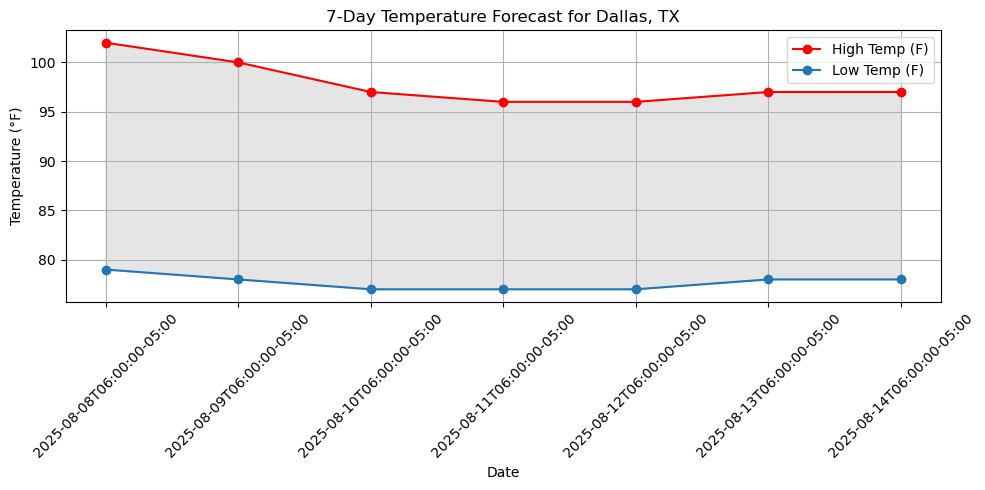

In [36]:
# visualize the data
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['High'], label='High Temp (F)', marker='o', color='red')
plt.plot(df['Date'], df['Low'], label='Low Temp (F)', marker='o')
plt.fill_between(df['Date'], df['High'], df['Low'], color='grey', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('7-Day Temperature Forecast for Dallas, TX')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Error Handling and Exception Management

In [42]:
import requests
import json

# Dallas
latitude = 32.7767
longitude = -96.7970

#NWS API Endpoint
points_url = f"https://api.weather.gov/points/{latitude},{longitude}"

try:
    # Fetch location information
    response = requests.get(points_url)
    data = response.json()

    # Extract forecast UR:L from location information
    forecast_url = data['properties']['forecast']

    # Fetch forecast data
    forecast_response = requests.get(forecast_url)
    forecast_response.raise_for_status() # Note
    forecast_data = forecast_response.json()

    # Print Current Weather information
    forecast_data_string = json.dumps(forecast_data, indent=4, sort_keys=True)
    print(forecast_data_string)

except requests.exceptions.RequestException as e:
    print(f"http request error: {e}")
except KeyError as e:
    print(f"Data processing error: {e}")
except Exception as e:
    print(f"Other error: {e}")

{
    "@context": [
        "https://geojson.org/geojson-ld/geojson-context.jsonld",
        {
            "@version": "1.1",
            "@vocab": "https://api.weather.gov/ontology#",
            "geo": "http://www.opengis.net/ont/geosparql#",
            "unit": "http://codes.wmo.int/common/unit/",
            "wx": "https://api.weather.gov/ontology#"
        }
    ],
    "geometry": {
        "coordinates": [
            [
                [
                    -96.7897,
                    32.7685
                ],
                [
                    -96.78999999999999,
                    32.7911
                ],
                [
                    -96.81689999999999,
                    32.7908
                ],
                [
                    -96.81649999999999,
                    32.7682
                ],
                [
                    -96.7897,
                    32.7685
                ]
            ]
        ],
        "type": "Polygon"
    },
    "pro